In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

(787, 500, 3)


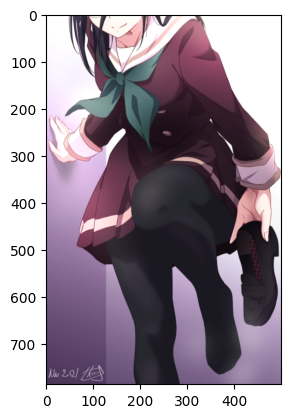

In [2]:
image = cv2.imread("../images/94147214_p0.png")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 轮廓周围绘制矩形框和圆形框

## 1.先要做边缘检测,获取二值图形

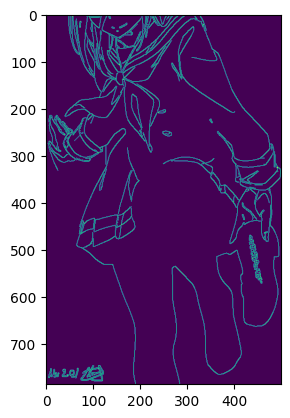

In [3]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(c)

## 2.计算轮廓

In [4]:
# 返回值为: 发现的轮廓对象, 图像的拓扑结构
contours, hierarchy = cv2.findContours(
    image=c,
    mode=cv2.RETR_TREE, # 方法
    method=cv2.CHAIN_APPROX_SIMPLE,
)

## 3.得到多种坐标

In [100]:
contours_ploy = []
rects = []
circles = []
ellipses = []
min_rects = []
for contour in contours:
    # 轮廓周围绘制矩形
    poly = cv2.approxPolyDP(
        curve=contour,
        epsilon=3,
        closed=True,
    )
    contours_ploy.append(poly)

    # 得到轮廓周围最小矩形左上交点坐标和右下角点坐标，绘制一个矩形
    rects.append(cv2.boundingRect(poly))            # 寻找包裹轮廓的最小正矩形

    circles.append(cv2.minEnclosingCircle(poly))    # 寻找包裹轮廓的最小圆

    if poly.shape[0] > 5:
        ellipses.append(cv2.fitEllipse(poly))       # 椭圆拟合
        rect = cv2.minAreaRect(poly)                # 得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
        min_rects.append(cv2.boxPoints(rect))    # 获取最小外接矩形的4个顶点坐标

print(len(contours_ploy), len(rects), len(circles), len(ellipses), len(min_rects))

261 261 261 39 39


## 4.绘制

In [108]:
black = np.zeros(image.shape, dtype=np.uint8)
for rect, cirlce in zip(rects, circles):
    cv2.rectangle(
        img=black,
        pt1=rect[:2],
        pt2=rect[2:4],
        color=(100, 0, 0),
    )
    cv2.circle(
        img=black,
        center=(int(cirlce[0][0]), int(cirlce[0][1])),
        radius=int(cirlce[1]),
        color=(255, 128, 0),
    )

for ellipse, min_rect in zip(ellipses, min_rects):
    cv2.ellipse(
        img=black,
        center=(int(ellipse[0][0]), int(ellipse[0][1])),
        axes=(int(ellipse[1][0]), int(ellipse[1][1])),
        angle=int(ellipse[2]),
        startAngle=0,
        endAngle=360,
        color=(127, 0, 255),
    )
    print(min_rect)
    for i in range(4):
        cv2.line(
            img=black,
            pt1=[int(min_rect[i][0]), int(min_rect[i][1])],
            pt2=(int(min_rect[(i+1) % 4][0]), int(min_rect[(i+1) % 4][1])),
            color=(0, 255, 0),
        )

[[ 16.00001  771.00006 ]
 [ 18.52942  760.8824  ]
 [ 27.00001  763.00006 ]
 [ 24.470598 773.11774 ]]
[[ 33.90098  769.99023 ]
 [ 35.42573  754.7427  ]
 [ 47.405933 755.9407  ]
 [ 45.881184 771.18823 ]]
[[  4.788232 772.953   ]
 [  9.164702 753.2589  ]
 [ 19.32941  755.5177  ]
 [ 14.952939 775.2118  ]]
[[ 73.955635 777.9981  ]
 [ 75.40955  745.285   ]
 [122.56086  747.38055 ]
 [121.10694  780.0937  ]]
[[ 71.70566 764.40533]
 [110.20264 750.14716]
 [116.02893 765.8781 ]
 [ 77.53195 780.1363 ]]
[[448.46152 541.3077 ]
 [453.65384 540.2692 ]
 [455.1923  547.9615 ]
 [449.99997 548.99994]]
[[442.0634  540.62933]
 [453.2634  538.2293 ]
 [460.4341  571.6927 ]
 [449.2341  574.0927 ]]
[[442. 538.]
 [442. 528.]
 [451. 528.]
 [451. 538.]]
[[427.30508 471.19897]
 [440.6605  468.38733]
 [453.00003 527.00006]
 [439.64462 529.8117 ]]
[[411.8941  405.37646]
 [417.57648 400.50586]
 [448.      436.     ]
 [442.31763 440.8706 ]]
[[434.      372.00003]
 [449.93964 367.93033]
 [477.72375 476.75143]
 [461.784

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


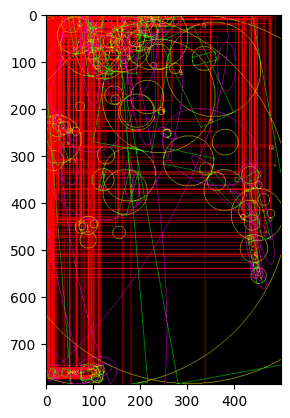

In [109]:
plt.imshow(black)